In [1]:
# Main libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings

# Image processing libraries
import cv2 
import dlib

# Local library
import Basic_Library as blib

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
# Create image path. Due to error in opencv, use absolute path.
open_path = os.path.abspath(os.path.join('..','data','Eyes_Open.jpg'))
closed_path = os.path.abspath(os.path.join('..','data','Eyes_Closed.jpg'))


In [3]:
open_path

'/home/smontesantos/code/personal/sleep-detection/data/Eyes_Open.jpg'

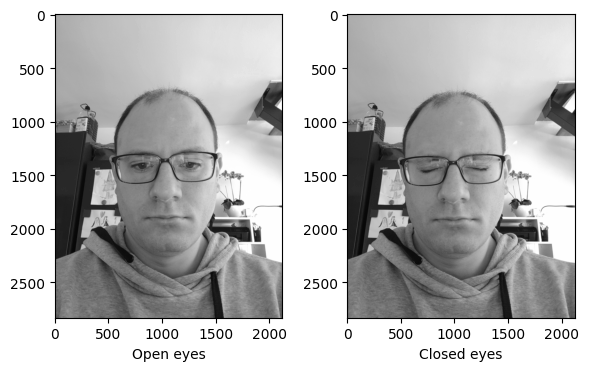

In [16]:
# Import and display the two test images using opencv and plt.
img_open = cv2.imread(open_path)
img_closed = cv2.imread(closed_path)

img_open_gray = cv2.cvtColor(img_open, cv2.COLOR_BGR2GRAY)
img_closed_gray = cv2.cvtColor(img_closed, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,8))

plt.subplot(1,2,1)
plt.imshow(img_open_gray, cmap='gray')
plt.xlabel('Open eyes')

plt.subplot(1,2,2)
plt.imshow(img_closed_gray, cmap='gray')
plt.xlabel('Closed eyes')

plt.tight_layout()

In [17]:
# Import face detector.
detector = dlib.get_frontal_face_detector()

# Import landmark predictor.
landmark_predictor_path = os.path.join('..', 'models', 'shape_predictor_68_face_landmarks.dat' )
predictor = dlib.shape_predictor(landmark_predictor_path)

Front facial detector found 1 faces


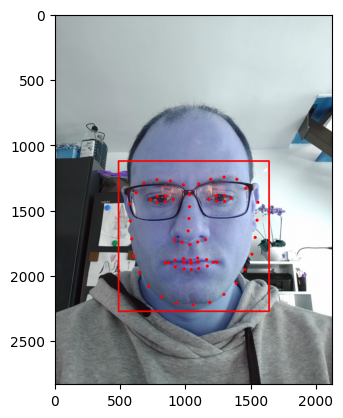

In [18]:
# Get frontface bbox and landmarks and display on the image for the open eyes.
faces = detector(img_open_gray, 1)

nb_faces_front=len(list(enumerate(faces)))
print("Front facial detector found {0} faces".format(nb_faces_front))


for face in faces:
    
    # Draw the face bounding box
    cv2.rectangle(img_open, (face.left(), face.top()), (face.right(), face.bottom()), (255, 0, 0), 12)

    shape = predictor(img_open_gray, face)
    shape = blib.shape_to_np(shape)
    
    for (x, y) in shape:
        cv2.circle(img_open, (x, y), 12, (255, 0, 0), -1)

plt.imshow(img_open)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Front facial detector found 1 faces


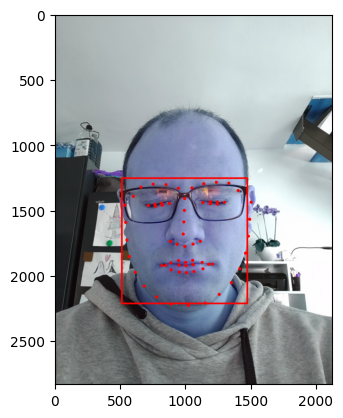

In [19]:
# Get frontface bbox and landmarks and display on the image for the closed eyes.
faces = detector(img_closed_gray, 1)

nb_faces_front=len(list(enumerate(faces)))
print("Front facial detector found {0} faces".format(nb_faces_front))


for face in faces:
    
    # Draw the face bounding box
    cv2.rectangle(img_closed, (face.left(), face.top()), (face.right(), face.bottom()), (255, 0, 0), 12)

    shape = predictor(img_closed_gray, face)
    shape = blib.shape_to_np(shape)
    
    for (x, y) in shape:
        cv2.circle(img_closed, (x, y), 12, (255, 0, 0), -1)

plt.imshow(img_closed)
# cv2.waitKey(0)
# cv2.destroyAllWindows()